In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
# from sklearn.cross_validation import cross_val_score
import pandas as pd
import numpy as np
from sklearn import metrics

clf = RandomForestClassifier(n_estimators=100)
use_jrnl_metrics=False

raw_data=pd.read_csv(r"RandomData.csv")

In [3]:
raw_data = raw_data.sample(frac=1).reset_index(drop=True)
train = raw_data.sample(frac=0.8, random_state=1)
test = raw_data.loc[~raw_data.index.isin(train.index)]
# , "q&a", "pinterest", "citeulike", "connotea"
data_columns=["mendeley", "twitter", "reddit", "q&a", "pinterest", "citeulike", "connotea", "facebook", "googleplus", "blogs", "video", "wikipedia", "weibo", "peer_reviews", "policy"]
#if use_jrnl_metrics:
#    data_columns.append("h_index")
train_data_array=train.as_matrix(columns=data_columns)
train_class_array= train['news'].values
test_data_array=test.as_matrix(columns=data_columns)
test_class_array= test['news'].values


In [4]:
kf=KFold(n_splits=10, random_state=None, shuffle=False)
validation_score=0
for train_index, test_index in kf.split(train_data_array):
    X_train, X_test = train_data_array[train_index], train_data_array[test_index]
    y_train, y_test = train_class_array[train_index], train_class_array[test_index]
    clf.fit(X_train, y_train)
    validation_pred=clf.predict(X_test)
    validation_score+=metrics.accuracy_score(y_test,validation_pred)

print("Validation Accuracy:   %0.3f" % (validation_score/kf.get_n_splits()))

pred = clf.predict(test_data_array)
score = metrics.accuracy_score(test_class_array, pred)
print("Accuracy:   %0.3f" % score)

score = metrics.precision_score(test_class_array, pred)
print("Precision:   %0.3f" % score)

score = metrics.recall_score(test_class_array, pred)
print("Recall:   %0.3f" % score)

score = metrics.f1_score(test_class_array, pred)
print("F-measure:   %0.3f" % score)

Validation Accuracy:   0.922
Accuracy:   0.924
Precision:   0.796
Recall:   0.658
F-measure:   0.720


In [5]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, data_columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. mendeley (0.168083)
2. facebook (0.151553)
3. twitter (0.147885)
4. blogs (0.106562)
5. googleplus (0.093940)
6. wikipedia (0.060543)
7. reddit (0.048159)
8. peer_reviews (0.044373)
9. policy (0.042591)
10. weibo (0.035900)
11. video (0.031691)
12. q&a (0.023858)
13. citeulike (0.018669)
14. pinterest (0.016235)
15. connotea (0.009959)


In [6]:
def perf_measure(test_class_array, pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(pred)): 
        if test_class_array[i]==pred[i]==1:
           TP += 1
    for i in range(len(pred)): 
        if (pred[i]==1 - test_class_array).all()!=pred[i]:
           FP += 1
    for i in range(len(pred)): 
        if test_class_array[i]==pred[i]==0:
           TN += 1
    for i in range(len(pred)): 
        if (pred[i]==0 - test_class_array).all()!=pred[i]:
           FN += 1
        
        return(TP, FP, TN, FN)

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\legend.py:325: UserWarning: Unrecognized location "lower_right". Falling back on "best"; valid locations are
	center
	upper left
	upper center
	upper right
	best
	lower right
	lower center
	right
	center right
	lower left
	center left

  six.iterkeys(self.codes))))


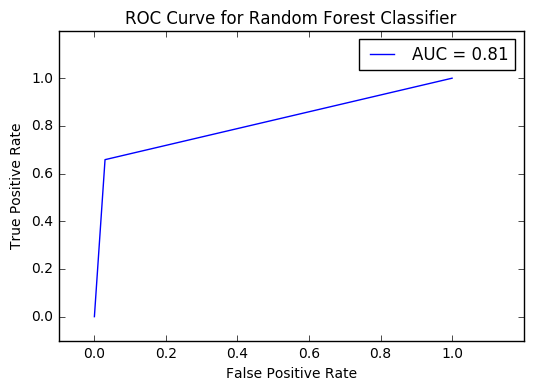

In [8]:
#roc = roc_curve(y_true, y_score, pos_label=None, sample_weight=None, drop_intermediate=True)
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fp, tp, th = roc_curve(test_class_array, pred)
roc_auc = auc(fp, tp)
plt.title('ROC Curve for Random Forest Classifier')
plt.plot(fp, tp, 'b', label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc = 'lower_right')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()